# RDkit homework

<strong>Author(s):</strong> Seth D. Veenbaas, Jessica A. Nash, The Molecular Sciences Software Institute

<div class="alert alert-block alert-info">
<h2>Objectives:</h2>

- Get the SMILES string of your favorite molecule.
- Draw a 2D structure and 3D model of your favorite molecule.
- Use `rdkit.Chem.Draw.SimilarityMaps.GetSimilarityMapFromWeights()` to visualize the partial charges in your favorite molecule.


</div>

In [2]:
# Import modules from the rdkit library
import rdkit
from rdkit.Chem import Draw, AllChem, rdMolDescriptors, Descriptors3D
from rdkit.Chem.Draw import SimilarityMaps
import py3Dmol

<div class="alert alert-block alert-warning">
<h3>Step 1</h3>

Determine the SMILES string for your favorite molecule (any complex molecule of your choice).

You can look up the SMILES strings on <a href="https://pubchem.ncbi.nlm.nih.gov/">PubChem</a> or <a href="https://en.wikipedia.org/wiki/Main_Page">Wikipedia</a>

**Tip**: Use quotation marks around your SMILES string like this:
```python
acetic_acid_smiles = "CC(=O)O"
```
</div>

In [3]:
# Save the SMILES of your favorite molecule to a variable
Camptothecin_smiles = r'O=C\1N4\C(=C/C2=C/1COC(=O)[C@]2(O)CC)c3nc5c(cc3C4)cccc5'


<div class="alert alert-block alert-warning">
<h3>Step 2</h3>

Use RDKit to covert your SMILES string into a molecule called `favorite_molecule` and draw `favorite_molecule`.

Helpful methods:
- [`rdkit.Chem.MolFromSmiles()`](https://www.rdkit.org/docs/GettingStartedInPython.html#reading-single-molecules)
- [`Chem.Draw.MolToImage()`](https://www.rdkit.org/docs/GettingStartedInPython.html#reading-single-molecules)
</div>

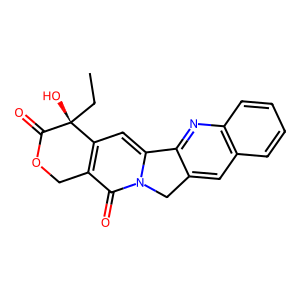

In [4]:
# Create an rdkit molecule and draw its structure
favorite_molecule = rdkit.Chem.MolFromSmiles(Camptothecin_smiles)
rdkit.Chem.Draw.MolToImage(favorite_molecule)

## 3D modeling

Run the cell below to interact with a 3D model of your favorite molecule.

Controls for the interactive py3Dmol window:

|  Action   |         Control         |
| :-------: | :---------------------: |
|  rotate   |  `left click` + `drag`  |
| translate | `center click` + `drag` |
|   zoom    | `right click` + `drag`  |

In [5]:
# Add Hydrogen atoms to molecule
favorite_molecule = AllChem.AddHs(favorite_molecule)

# Create a 3D molecule
AllChem.EmbedMolecule(favorite_molecule)

# Minimize energy of molecular conformation
AllChem.MMFFOptimizeMolecule(favorite_molecule)

# Open RDKit molecule in an interactive py3Dmol window
py3Dmol.view(
    data=rdkit.Chem.MolToMolBlock(favorite_molecule),
    style={"stick": {}, "sphere": {"scale": 0.3}}
)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<div class="alert alert-block alert-warning">
<h3>Step 3</h3>

Visualize the partial charge of your favorite molecule using the `SimilarityMaps.GetSimilarityMapFromWeights()` function.

Refer to [Day1_cheminformatics](../Day1_rdkit_completed.ipynb) Visualizing Partial Charges with RDKit for help.

</div>

### `SimilarityMaps.GetSimilarityMapFromWeights()`:

**Purpose**
  - Creates a similarity map visualization of molecular properties (e.g., atom-based charges).

**Parameters**
  - `mol`: The molecule object (e.g., `ibuprofen`).
  - `weights`: A list of numeric values (e.g., partial charges) for each atom in the molecule.
  - `contourLines`: Number of contour lines to display (default: `10`).
  - `colorMap`: Matplotlib color scheme for the map (e.g., `jet`, `seismic`, `viridis`).
  - `size`: Size of the image in pixels (default: `(250, 250)`)

**Returns**
  - An image of the molecule with the similarity map overlaid.


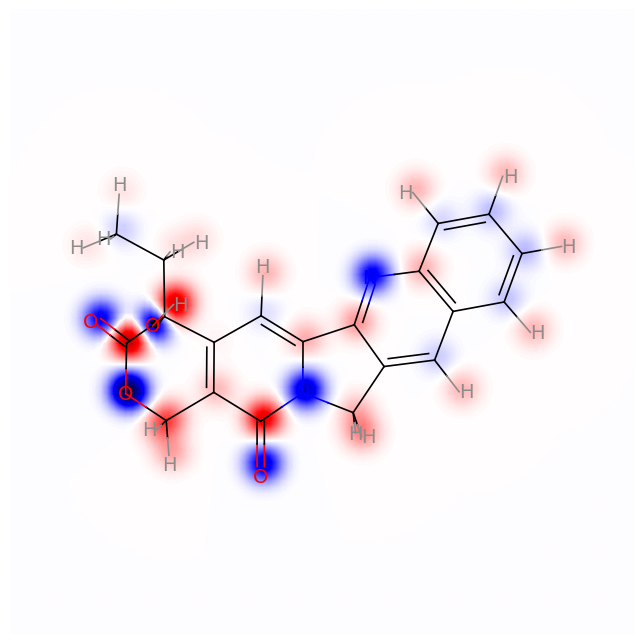

In [6]:
# Compute Gasteiger partial charges
AllChem.ComputeGasteigerCharges(favorite_molecule)

# Generate a list with the charge weights (Gasteiger charges) for each atom
charge_weights = [favorite_molecule.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(favorite_molecule.GetNumAtoms())]

# Generate a similarity map
similarity_map = SimilarityMaps.GetSimilarityMapFromWeights(favorite_molecule, charge_weights, contourLines=0, colorMap='seismic')